In [1]:
# Import Python packages
import pickle

# Third-Party Imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def score_p(results, true_coeffs):
    for result in results:
        len_diff = int((len(true_coeffs['p'])-len(result['p']))/2)
        diff = true_coeffs['p'][len_diff:-len_diff] - result['p']
        score = np.linalg.norm(diff)
        score = score/np.linalg.norm(true_coeffs['p'][len_diff:-len_diff])
        result['score'] = score
    return results

In [3]:
# Figure 5a
file_stem = "./data/Fig5a-NLSL-"
results = pickle.load(open(file_stem +"results.pickle", "rb"))
true_coeffs = pickle.load(open("./data/S2-NLSL-coeffs.pickle", "rb"))

results = score_p(results, true_coeffs)

In [4]:
plot_nm = []
plots_sc = []

for result in results:
    plot_nm.append(result['noise_mag'])
    plots_sc.append(result['score'])

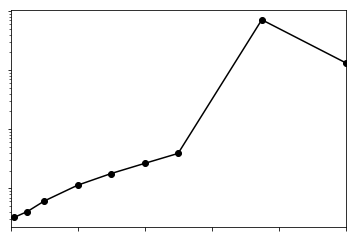

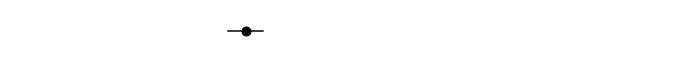

In [5]:
import matplotlib as mpl
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 20

figsize = (6,4)
# Create figure
plt.figure(figsize=figsize)
# set axes
ax1 = plt.gca()
#ax1.autoscale(False, axis='y')
# Plot the results
#ax1.set_yscale('symlog')
#loss_plot = [losses[idc] for idc in idcs]
pltstyle=dict(linestyle=None,marker='o')
ax1.semilogy(plot_nm, plots_sc, color='black', label = "p(x) Error", **pltstyle)
# Place the legend
lines = ax1.get_lines()
labels = [line.get_label() for line in lines]
labels = ['' for line in lines]
# Turn off all the tick labels
ax1.tick_params(labelbottom=False, labelleft=False)
#plt.hlines(0.15, 0, 0.15, linestyles="--")
plt.xlim([0,0.1])
plt.savefig('./Figs/5a-NLSL-pq-noise-vs-error.svg', dpi=600, transparent=True)

# Create separate axes
legend_figsize = (figsize[0]*2, figsize[1]/5)
plt.figure(figsize=legend_figsize)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
plt.legend(lines, labels, ncol=2, loc='center', frameon=False)
plt.savefig('./Figs/5-legend.svg', dpi=600, transparent=True)

plt.show()

In [6]:
# Figure 5b
file_stem = "./data/Fig5b-NLSL-"
results = pickle.load(open(file_stem +"results.pickle", "rb"))
true_coeffs = pickle.load(open("./data/S2-NLSL-coeffs.pickle", "rb"))

results = score_p(results, true_coeffs)

plot_trials = []
plots_sc = []

for result in results:
    plot_trials.append(result['num_trials'])
    plots_sc.append(result['score'])

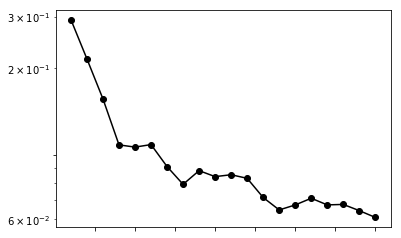

In [7]:
import matplotlib as mpl
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 20
pltstyle=dict(linestyle=None,marker='o')


figsize = (6,4)
# Create figure
plt.figure(figsize=figsize)
# set axes
ax1 = plt.gca()
# Plot the results
#plt.hlines(0.15, 0, 200, linestyles="--")
plt.semilogy(plot_trials, plots_sc, 'o-', color='k')

# Place the legend
lines = ax1.get_lines()
labels = [line.get_label() for line in lines]
labels = ['' for line in lines]

# Turn off all the tick labels
ax1.tick_params(labelbottom=False, labelleft=False)

# Save figure
plt.savefig('./Figs/5b-NLSL-trials-vs-error.svg', dpi=600, transparent=True)

plt.show()

In [8]:
print(plots_sc)

[0.292884825268925, 0.21452690420673007, 0.15614801349975646, 0.1084693733963122, 0.10656189745688766, 0.10871641123509808, 0.09130282329012424, 0.07928939494973766, 0.08840986759948678, 0.08429827780858089, 0.08558348980051828, 0.08317005961161977, 0.07143127558680834, 0.0647191425895788, 0.06732586341470456, 0.07100803772497244, 0.06735583768612637, 0.06761224931472408, 0.0643614682394475, 0.060984799409459896]
